In [30]:
library(terra)

path = "/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/for_maps"
out = "/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/for_maps_float"
dir.create(out, recursive = T)

all_files = list.files(path, full.names = F, pattern = ".tif$")

for(f in all_files){
    
    in_ras = rast(file.path(path, f))[[3]]
                  
    

    raster01 = function(r){

        # get the min max values
          minmax_r = range(values(r), na.rm=TRUE) 

        # rescale 
         return( (r-minmax_r[1]) / (diff(minmax_r)))
    }
    in_ras = raster01(in_ras)
    in_ras[is.na(in_ras)] = 250
    in_ras = in_ras * 100
    # in_ras <- rescale(in_ras, from = range(in_ras), to = c(0, 255), type = "integer")

    writeRaster(in_ras, file.path(out, f), overwrite = T, datatype = 'INT8U')

    print(f)
    
    
}

Warning message in dir.create(out, recursive = T):
“'/explore/nobackup/people/spotter5/cnn_mapping/nbac_training/for_maps_float' already exists”


[1] "for_map_2004_480.tif"
[1] "for_map_2005_529.tif"
[1] "for_map_2005_582.tif"
[1] "for_map_2014_9262.tif"
[1] "for_map_2014_9338.tif"
[1] "for_map_2015_10091.tif"
[1] "for_map_2015_778.tif"
[1] "for_map_2015_860.tif"
[1] "for_map_2015_913.tif"
[1] "for_map_2015_9703.tif"
[1] "for_map_2015_9928.tif"
[1] "for_map_2015_9995.tif"


In [20]:
in_ras

class       : SpatRaster 
dimensions  : 1978, 1994, 1  (nrow, ncol, nlyr)
resolution  : 30, 30  (x, y)
extent      : -3491700, -3431880, -1691520, -1632180  (xmin, xmax, ymin, ymax)
coord. ref. : WGS 84 / NSIDC Sea Ice Polar Stereographic North (EPSG:3413) 
source      : memory 
name        : NBR 
min value   :   0 
max value   : 100 

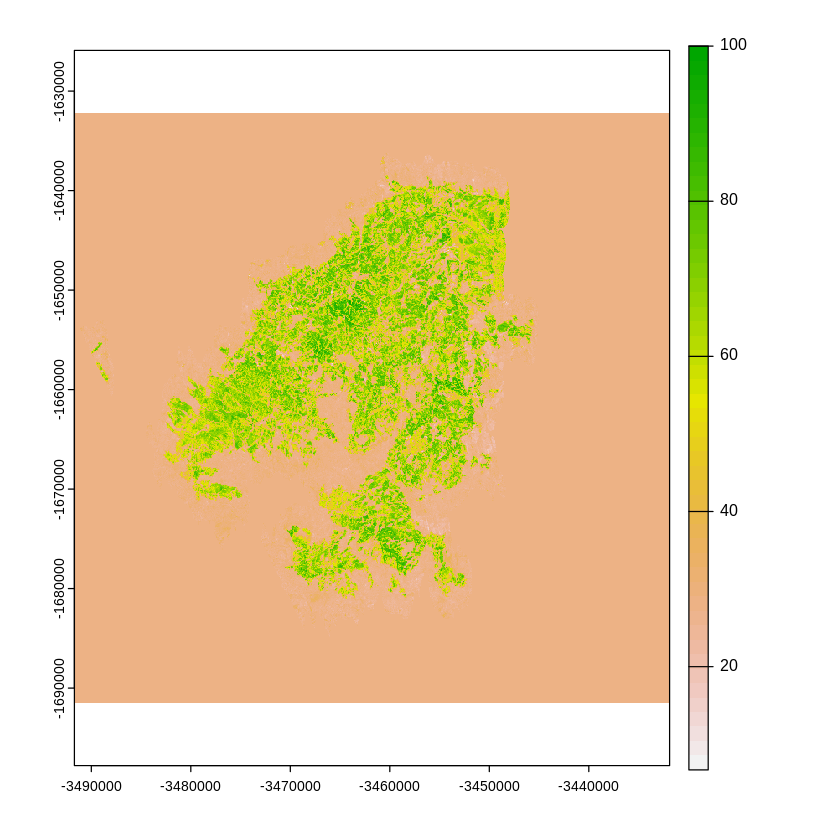

In [29]:
plot(in_ras)

In [24]:
t = rast("/explore/nobackup/people/spotter5/combustion/final_files2/translate/translated_2004.tif")
t

class       : SpatRaster 
dimensions  : 13568, 27136, 3  (nrow, ncol, nlyr)
resolution  : 463.3127, 463.3127  (x, y)
extent      : -13728882, -1156429, 3721328, 10007555  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=sinu +lon_0=0 +x_0=0 +y_0=0 +R=6371007.181 +units=m +no_defs 
source      : translated_2004.tif 
names       : translated_2004_1, translated_2004_2, translated_2004_3 
min values  :      1.062707e-06,      0.000000e+00,      0.000000e+00 
max values  :                 1,               364,                27 

In [25]:
library(sf)
crs(t, proj = T)
#sf::st_crs(raster)$epsg

Linking to GEOS 3.11.0, GDAL 3.5.2, PROJ 9.0.1; sf_use_s2() is TRUE


Linked against: 3.11.0-CAPI-1.17.0 compiled against: 3.10.3-CAPI-1.16.1

It is probably a good idea to reinstall sf, and maybe rgeos and rgdal too



[1] "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +R=6371007.181 +units=m +no_defs"

In [27]:
sf::st_crs(crs(t, proj = T))$epsg

[1] NA

In [28]:
t

class       : SpatRaster 
dimensions  : 13568, 27136, 3  (nrow, ncol, nlyr)
resolution  : 463.3127, 463.3127  (x, y)
extent      : -13728882, -1156429, 3721328, 10007555  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=sinu +lon_0=0 +x_0=0 +y_0=0 +R=6371007.181 +units=m +no_defs 
source      : translated_2004.tif 
names       : translated_2004_1, translated_2004_2, translated_2004_3 
min values  :      1.062707e-06,      0.000000e+00,      0.000000e+00 
max values  :                 1,               364,                27 